# Can You Survive “The Floor”? (2024.12.13)

link: https://thefiddler.substack.com/p/can-you-survive-the-floor

## I. Puzzle

In the game show, The Floor, 100 contestants are assigned to spaces on a 10×10 square grid. Over the course of a season, they compete one-on-one against their immediate neighbors by answering trivia questions. The loser of each duel is eliminated, and the square or squares they control are consigned to the winner.

Let’s consider a slightly simplified version of The Floor with nine contestants on a 3×3 square grid. Each round of the game consists of the following steps:

- One of the remaining contestants is chosen at random. (Note that each contestant is equally likely to be chosen, regardless of how many squares they currently control.)
- The set of eligible opponents for this contestant is anyone whose territory shares a common edge with the contestant. One of these eligible opponents is chosen at random. (Again, all eligible opponents are equally likely to be chosen, regardless of how many squares they control or how many edges they have in common with the opponent.)
- The contestant and their selected opponent have a duel, each with a 50 percent chance of winning. The loser is eliminated, and their territory is added to that of the winner.

These rounds repeat until one contestant remains, and that contestant is the overall winner.

You are a contestant on a new season of this 3×3 version of The Floor. The nine positions on the grid are shown below: ...

Which position would you choose? That is, which position or positions give you the best chance of being the overall winner?

# II. Solution

We will solve this with a Monte Carlo simulation. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
def simulate_game(n_rows, n_columns, trials):
	winner_arr = []

	# Create a grid
	grid = np.concatenate((			
				np.zeros(n_columns),	# Add 'border' with zeros for easier handling later 
				list(np.arange(1, (n_columns * n_rows) + 1)),
				np.zeros(n_columns))
			).reshape(n_rows + 2, n_columns)

	grid = np.vstack((		
				np.zeros(n_rows + 2), 
				grid.T, 
				np.zeros(n_rows + 2))
			).T.astype(int)

	# Create a dictionary with adjacent_space to a given space
	adjacent_space  = {}
	for r_index, row in enumerate(grid):
		for c_index, space in enumerate(row):
			if space == 0:	continue

			lst = [
				grid[r_index - 1, c_index],
				grid[r_index + 1, c_index],
				grid[r_index, c_index - 1],
				grid[r_index, c_index + 1]]

			adjacent_space[space] = [z for z in lst if z != 0]

	for _ in range(trials):
		owned_spaces = {space: [space] for space in range(1, (n_columns * n_rows) + 1)}  # player: list[spaces]

		rounds = n_rows * n_columns - 1
		for _ in range(rounds):
			
			player_1 = np.random.choice(list(owned_spaces.keys()))

			player_1_adjacent_spaces = [
				adjacent_space[l] 
				for l 
				in owned_spaces[player_1]]

			player_1_adjacent_spaces_flat = [
				item 
				for sublist in player_1_adjacent_spaces 
				for item in sublist 
				if item not in owned_spaces[player_1]]

			possible_opponents = [
				key 
				for key, value 
				in owned_spaces.items()  
				for space in player_1_adjacent_spaces_flat 
				if space in value]

			player_2 = np.random.choice(possible_opponents)

			if np.random.random() > 0.5:  
				loser, winner = player_1, player_2
			else:
				loser, winner = player_2, player_1

			owned_spaces[winner] = owned_spaces[winner] + owned_spaces[loser] 
			del owned_spaces[loser] 
		
		winner_arr.append(list(owned_spaces.keys())[0])

	# Create a diagram
	fig, ax = plt.subplots()

	prob_dict = {key: value/len(winner_arr) for key, value in Counter(winner_arr).items()}
	prob_arr = np.array([prob_dict[p] for p in range(1,(n_columns * n_rows) + 1)]).reshape(n_rows, n_columns)

	_ = ax.matshow(prob_arr, cmap='coolwarm_r', alpha=1) 

	for (i, j), value in np.ndenumerate(prob_arr):
		ax.text(j, i, f'{value:.3f}', ha='center', va='center', color='black')
		
	plt.axis('off')





array([[0.133824, 0.097504, 0.132928],
       [0.097116, 0.075416, 0.097972],
       [0.13396 , 0.098172, 0.133108]])

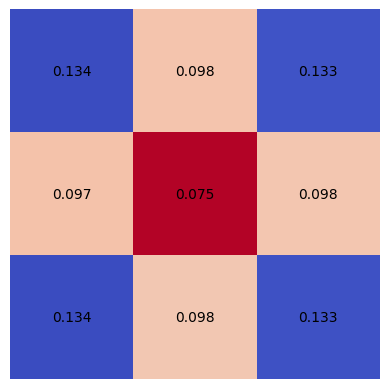

In [10]:
simulate_game(3, 3, 250_000)

**Solution:** The highest chances to win have the players in the corner spaces with a probability of approx. 0.133 each.